# Z-score

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 假设这是你的数据集
data =  pd.read_csv('Corr_content.csv', sep=',', usecols=[0,1])
data_x = data.iloc[:, 0].to_numpy()
data_y = data.iloc[:, 1].to_numpy()
print(f'x={data_x}, \ny={data_y},\nlen={len(data)}')

x=[365 362 369 365 360 364 360 379 375 401 425 420 433 418 421 417 415 423
 441 447 443 428 413 400 392 391 378 383 385 358 390 385 405 401 397 387
 376 384 360 356 357 340 348 351 353 354 354 327 328 370 391 374 382 370
 369 378 388 389 391 394 396 403 396 397 388 400 404 404 428 423 434 428
 417 418 417 425 421 409 406 395 396 408 393 411 398 407 413 412 417 390
 376 383 417 413 424 408 400 409 401 408 393 388 378 390 400 387 398 400
 403 392 399 399 397 415 430 427 424 423 406 413 410 389 383 378 354 363
 362 379], 
y=[ 75  75  86  79  87 100 111 110 105  71  92  64  81  90 104  92  85  74
  89  93  74  76  79  88  97  92 102 107 100 101  87  80  83  96  99  85
  78  80  87  84  91  97 105 111 115 123 128 130 149 156 140 131 128 127
 122 114 114 114 104 100  94  92  81 103 102 110 115 120 118 123 116 108
 105  98 104  69  81  78  78  83  85  92  67  99  75  89  97  93  82 118
 121 122 102 111  96 117 124 111 115 107 112 117 120 136 134 136 130 110
 104 114 116 116 116 110 112 112 10

In [54]:
new_data = np.concatenate((data_x[:, np.newaxis], data_y[:, np.newaxis]), axis=1)
new_data[:,0]

array([365, 362, 369, 365, 360, 364, 360, 379, 375, 401, 425, 420, 433,
       418, 421, 417, 415, 423, 441, 447, 443, 428, 413, 400, 392, 391,
       378, 383, 385, 358, 390, 385, 405, 401, 397, 387, 376, 384, 360,
       356, 357, 340, 348, 351, 353, 354, 354, 327, 328, 370, 391, 374,
       382, 370, 369, 378, 388, 389, 391, 394, 396, 403, 396, 397, 388,
       400, 404, 404, 428, 423, 434, 428, 417, 418, 417, 425, 421, 409,
       406, 395, 396, 408, 393, 411, 398, 407, 413, 412, 417, 390, 376,
       383, 417, 413, 424, 408, 400, 409, 401, 408, 393, 388, 378, 390,
       400, 387, 398, 400, 403, 392, 399, 399, 397, 415, 430, 427, 424,
       423, 406, 413, 410, 389, 383, 378, 354, 363, 362, 379], dtype=int64)

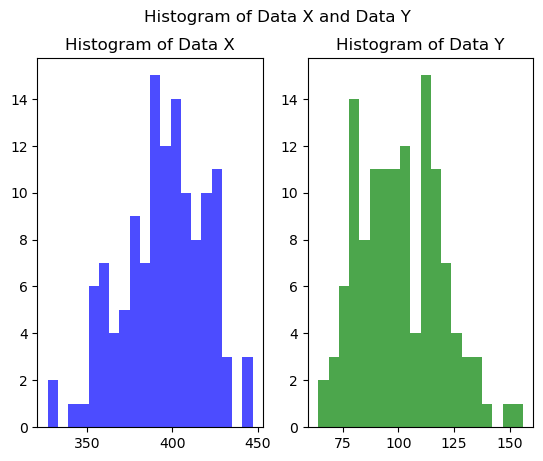

In [39]:
# 创建一个新的图形
plt.figure()

# 绘制data_x的直方图
plt.subplot(1, 2, 1)  # 一个1x2的子图网格的第一个
plt.hist(data_x, bins=20, color='blue', alpha=0.7, label='Data X')

# 绘制data_y的直方图
plt.subplot(1, 2, 2)  # 一个1x2的子图网格的第二个
plt.hist(data_y, bins=20, color='green', alpha=0.7, label='Data Y')

# 添加图例
#plt.legend()

# 添加标题和标签
plt.suptitle('Histogram of Data X and Data Y')  # 总标题
plt.subplot(1, 2, 1).set_title('Histogram of Data X')  # 第一个子图的标题
plt.subplot(1, 2, 2).set_title('Histogram of Data Y')  # 第二个子图的标题
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# 展示图形
plt.show()

In [56]:
data_x = [366 ,365 ,365 ,365 ,365 ,366, 365 ,365, 365, 364 ,364 ,363, 363, 364 ,365 ,366, 367 ,367,369 ,369]

In [57]:
# 计算平均值和标准差
mean_x = np.mean(data_x)
std_dev_x = np.std(data_x)
# 计算Z-score
z_scores_x = (data_x - mean_x) / std_dev_x
# 定义Z-score的阈值
threshold_x = 2
z_scores_x

array([ 0.37647348, -0.25098232, -0.25098232, -0.25098232, -0.25098232,
        0.37647348, -0.25098232, -0.25098232, -0.25098232, -0.87843813,
       -0.87843813, -1.50589393, -1.50589393, -0.87843813, -0.25098232,
        0.37647348,  1.00392929,  1.00392929,  2.2588409 ,  2.2588409 ])

In [45]:
print(f'min={min(z_scores_x)},\nmax={max(z_scores_x)}')

min=-2.7571249887339517,
max=2.1689468766788083


In [48]:
# 识别异常值的布尔索引
outliers_x = np.abs(z_scores_x) > threshold_x
print(outliers_x)
# 去除异常值
filtered_data_x = data[~outliers_x]
len(filtered_data_x)

[False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


123

In [55]:
data[outliers_x]

,361,75
19,447,93
20,443,74
41,340,97
47,327,130
48,328,149


In [43]:
print("原始数据:", data)
print("Z-scores:", z_scores)
print("去除异常值后的数据:", filtered_data)

原始数据:      361   75
0    365   75
1    362   75
2    369   86
3    365   79
4    360   87
..   ...  ...
123  378   84
124  354   99
125  363   95
126  362  100
127  379   91

[128 rows x 2 columns]
Z-scores:           361        75
0   -1.197202 -1.397737
1   -1.320354 -1.397737
2   -1.033000 -0.801369
3   -1.197202 -1.180876
4   -1.402455 -0.747154
..        ...       ...
123 -0.663544 -0.909800
124 -1.648759 -0.096571
125 -1.279303 -0.313432
126 -1.320354 -0.042356
127 -0.622494 -0.530293

[128 rows x 2 columns]
去除异常值后的数据:      361   75
0    365   75
1    362   75
2    369   86
3    365   79
4    360   87
..   ...  ...
123  378   84
124  354   99
125  363   95
126  362  100
127  379   91

[128 rows x 2 columns]
